# MNIST Neural Network Digit Classifier

### Importing Data

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data_pd= pd.read_csv('train.csv')
data_pd

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Move to a np array
data = np.array(data_pd)
m, n = data.shape
print(m,n)

42000 785


In [ ]:
#Split into training and testing data and Transposing to get right dimensions. We divide by 255 because every value in the MNIST takes on a value from 0-255
np.random.shuffle(data)
data_test = data[0:2000].T
Y_test = data_test[0]
X_test = data_test[1:n]/255


data_train = data[2000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]/255

In [ ]:
#1x40000 matrix, each number represents the label of the image
Y_train.shape

(40000,)

In [ ]:
#784x40000 matrix, each columns is one "datapoint"
X_train.shape

(784, 40000)

In [ ]:
#Initialize the parameters: weights and biases. We divide by 784 to basically normalize it.
def init_param():
    W1 = np.random.normal(size=(10, 784)) * np.sqrt(1./(784)) #10x784
    b1 = np.random.normal(size=(10, 1)) * np.sqrt(1./10) #10x1
    W2 = np.random.normal(size=(10, 10)) * np.sqrt(1./20) #10x10
    b2 = np.random.normal(size=(10, 1)) * np.sqrt(1./(784)) #10x1
    return W1, b1, W2, b2
    

In [ ]:
#Create activation functions
def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    exp = np.exp(Z - np.max(Z))
    return exp / exp.sum(axis=0)

In [ ]:
#Forward propogation
def forward_prop(W1, B1, W2, B2, X):
    Z1 = W1.dot(X) + B1 #(10x784)*(784x4000) = 10x40000
    A1 = ReLU(Z1) #10x40000
    Z2 = W2.dot(A1) + B2 #(10x10)*(10x40000) = 10x40000
    A2 = softmax(Z2) #10x40000
    return Z1, A1, Z2, A2


In [ ]:
#One hot encode the labels: Y
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

#Returns 10xn matrix of 0s except for 1 one

In [ ]:
#Back Propogation
def deriv_ReLU(Z):
    return Z >0

def back_prop(Z1, A1, Z2, A2, W2, X, Y, m):
    one_hot_Y = one_hot(Y)
    dZ2 = 2* (A2 - one_hot_Y)
    dW2 = 1/m * dZ2.dot(A1.T)
    dB2 = 1/m * np.sum(dZ2, 1)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1/m * dZ1.dot(X.T)
    dB1 = 1/m * np.sum(dZ1, 1)
    return dW1, dB1, dW2, dB2


In [ ]:
#update the parameters to loop
def update_param(W1, B1, W2, B2, dW1, dB1, dW2, dB2, alpha):
    W1 = W1 - alpha * dW1 
    B1 = B1 - alpha * np.reshape(dB1, (10,1))
    W2 = W2 - alpha * dW2
    B2 = B2 - alpha * np.reshape(dB2, (10,1))
    return W1, B1, W2, B2


In [ ]:
def get_predictions(A2):
    return np.argmax(A2, axis =0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size


def gradient_descent(X, Y, iterations, alpha):
    size, m = X.shape
    W1, B1, W2, B2 = init_param()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, B1, W2, B2, X)
        dW1, dB1, dW2, dB2 = back_prop(Z1, A1, Z2, A2, W2, X, Y, m)
        W1, B1, W2, B2 = update_param(W1, B1, W2, B2, dW1, dB1, dW2, dB2, alpha)
        if i % 100 == 0: #Just to see our accuracy is increasing for the iterations
            print("Iteration: ", i) 
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, B1, W2, B2
        

In [ ]:
#Test model on training dataset 
W1, B1, W2, B2 = gradient_descent(X_train, Y_train, 500, 0.1)

Iteration:  0
[0 5 0 ... 0 0 9] [7 1 6 ... 6 2 2]
0.0779
Iteration:  100
[7 1 6 ... 6 2 2] [7 1 6 ... 6 2 2]
0.877125
Iteration:  200
[7 1 6 ... 6 2 2] [7 1 6 ... 6 2 2]
0.902
Iteration:  300
[7 1 6 ... 6 2 2] [7 1 6 ... 6 2 2]
0.91055
Iteration:  400
[7 1 6 ... 6 2 2] [7 1 6 ... 6 2 2]
0.915875


In [ ]:
#Test model on testing dataset
TW1, TB1, TW2, TB2 = gradient_descent(X_test, Y_test, 500, 0.1)

Iteration:  0
[2 7 7 ... 2 6 6] [1 3 1 ... 9 5 9]
0.0975
Iteration:  100
[1 3 1 ... 9 5 9] [1 3 1 ... 9 5 9]
0.8805
Iteration:  200
[1 3 1 ... 9 5 9] [1 3 1 ... 9 5 9]
0.9195
Iteration:  300
[1 3 1 ... 9 5 9] [1 3 1 ... 9 5 9]
0.943
Iteration:  400
[1 3 1 ... 9 5 9] [1 3 1 ... 9 5 9]
0.9605


In [ ]:
#To test predictions and visualize
def make_predictions(X, W1, B1, W2, B2):
    _, _, _, A2 = forward_prop(W1, B1, W2, B2, X)
    predictions = get_predictions(A2)
    return predictions


def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28))
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [7]
Label:  7


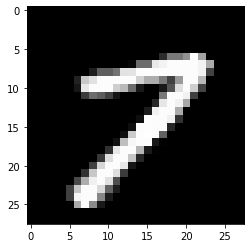

Prediction:  [1]
Label:  1


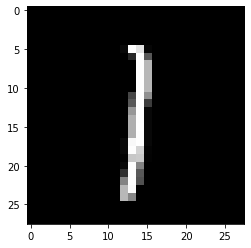

Prediction:  [6]
Label:  6


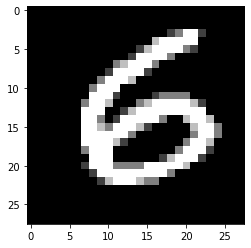

Prediction:  [9]
Label:  9


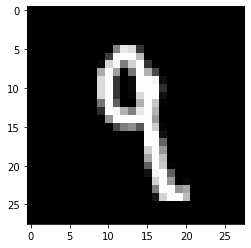

Prediction:  [3]
Label:  3


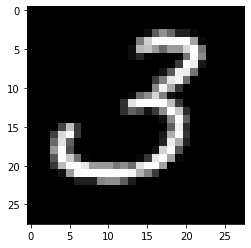

Prediction:  [5]
Label:  5


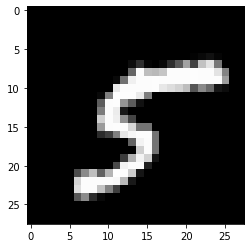

Prediction:  [1]
Label:  1


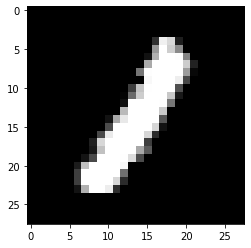

Prediction:  [1]
Label:  1


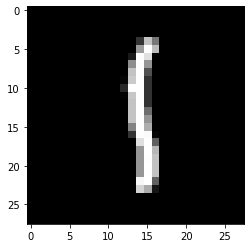

Prediction:  [8]
Label:  8


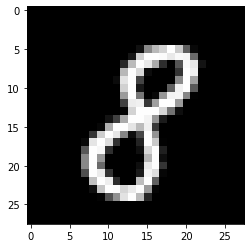

Prediction:  [1]
Label:  1


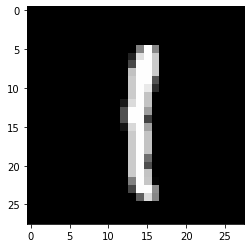

Prediction:  [9]
Label:  9


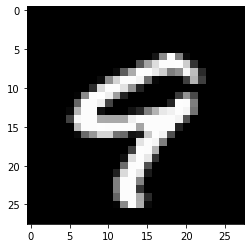

Prediction:  [7]
Label:  7


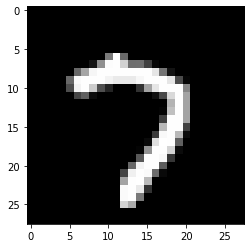

Prediction:  [5]
Label:  5


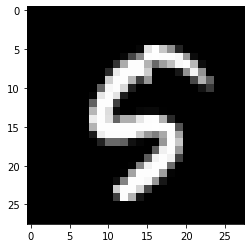

Prediction:  [9]
Label:  0


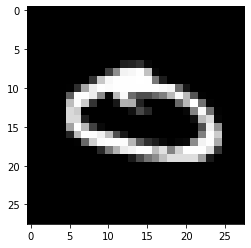

Prediction:  [7]
Label:  7


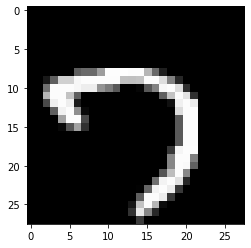

Prediction:  [4]
Label:  4


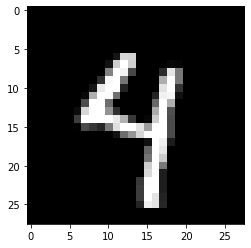

Prediction:  [6]
Label:  6


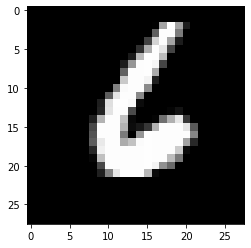

Prediction:  [3]
Label:  3


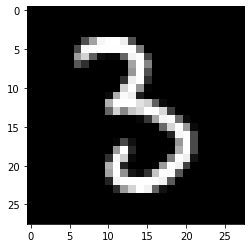

Prediction:  [1]
Label:  1


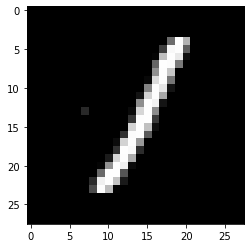

Prediction:  [7]
Label:  7


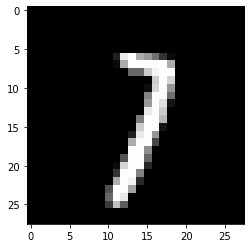

In [ ]:
for i in range(20):
    test_prediction(i, W1, B1, W2, B2)